In [1]:
import numpy as np   # numercal python. 수치 해석
import pandas as pd   # DataFrame을 쉽게 다루기

import matplotlib.pyplot as plt   # Data visualization
import seaborn as sns   # Data visualization
sns.set_style("whitegrid")   # Seaborn 스타일 설정
sns.set(font_scale = 2.0)   # seaborn 라이브러리 세팅 (plot의 모든 폰트 사이즈를 2.0로 지정)

import missingno as msno   # 데이터셋에 채워지지 않은 null 데이터를 쉽게 보여줄 수 있는 라이브러리

import warnings 
warnings.filterwarnings('ignore')   # ignore warning

In [2]:
pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)

ts = pd.read_csv('ts_prepro_wo_NLP.csv')
ts.head(10)

,Date,PPXDK00/FO 380 CST 3.5%S FOB Spore Cargo/CLOSE,PUABC00/FO 3.5%S FOB Rdam Barge/CLOSE,PUAFT00/Bunker FO 380 CST Dlvd Singapore/CLOSE,AALMZ00/Marine Gasoil 0.5% Dlvd Singapore/CLOSE,PUAFN00/Bunker FO 380 CST 3.5% Dlvd Rotterdam/CLOSE,AAYWT00/Gasoil .1%S (1000ppm) FOB ARA Barge (NextGen MOC)/CLOSE,AARTG00/Marine Gasoil 0.1% Dlvd Rotterdam/CLOSE,AARKD00/Bunker FO 380 CST Dlvd Shanghai/CLOSE,AARKE00/Marine Gasoil 0.5% Dlvd Shanghai/CLOSE,PUAFL00/Bunker FO 380 CST 3.5% Dlvd Piraeus/CLOSE,POADG00/Marine Gasoil 0.1% Dlvd Piraeus/CLOSE,PUAER00/Bunker FO 380 CST Dlvd Hong Kong/CLOSE,AAXYQ00/Low Sulfur Marine Gasoil 0.1% Dlvd Hong Kong/CLOSE,PUAFD00/Bunker FO 380 CST 3.5% Ex-Wharf Genoa/CLOSE,PBABK00/Marine Gasoil 0.1% Ex-Wharf Genoa/CLOSE,PUAGQ00/Bunker FO 380 CST Dlvd Busan/CLOSE,AARKJ00/Marine Gasoil 0.5% Dlvd Busan/CLOSE,AAMNV00/Bunker FO 380 CST 3.5% Dlvd Charleston/CLOSE,AAWWV00/Marine Gasoil 0.1% Dlvd Charleston/CLOSE,AAGPM00/Bunker FO 380 CST 3.5% Dlvd Los Angeles/CLOSE,AAWWY00/Marine Gasoil 0.1% Dlvd Los Angeles/CLOSE,PBAAP00/Bunker FO 380 CST 3.5% Ex-Wharf Los Angeles/CLOSE,AAWYR00/Marine Gasoil 0.1% Ex-Wharf Los Angeles/CLOSE,AAGPD00/Bunker FO 380 CST 3.5% Dlvd Houston/CLOSE,AAWWX00/Marine Gasoil 0.1% Dlvd Houston/CLOSE,AAGQN00/Bunker FO 380 CST 3.5% Dlvd New York/CLOSE,AAWYB00/Marine Gasoil 0.1% Dlvd New York/CLOSE,AAGQW00/Bunker FO 380 CST 3.5% Dlvd Norfolk/CLOSE,AAWYC00/Marine Gasoil 0.1% Dlvd Norfolk/CLOSE,AAXJR00/Bunker FO 380 CST 3.5% Ex-Wharf Savannah/CLOSE,AAWZF00/Marine Gasoil 0.1% Ex-Wharf Savannah/CLOSE,AAGSG00/Bunker FO 380 CST 3.5% Dlvd Seattle/CLOSE,AAWYL00/Marine Gasoil 0.1% Dlvd Seattle/CLOSE,AAKAB00/Bunker FO 380 CST 3.5% Dlvd Gibraltar/CLOSE,AARSU00/Marine Gasoil 0.1% Dlvd Gibraltar/CLOSE,PUAEV00/Bunker FO 380 CST Dlvd Japan/CLOSE,POACI00/Marine Diesel 0.5% Dlvd Japan/CLOSE,PBABW00/Marine Gasoil 0.1% Dlvd El Callao/CLOSE,PUAYR00/Bunker FO 380 CST 3.5% Dlvd Valparaiso/CLOSE,PBABX00/Marine Gasoil 0.1% Dlvd Valparaiso/CLOSE,PUBAD00/Bunker FO 380 CST 3.5% Ex-Wharf Balboa/CLOSE,AAXWI00/Marine Gasoil 0.1% Ex-Wharf Panama Canal/CLOSE,AARKK00/Marine Gasoil 0.5% Dlvd Colombo/CLOSE,AAWYU00/Marine Gasoil 0.1% Ex-Wharf New York/CLOSE,PUAFI00/Bunker FO 380 CST 3.5% Ex-Wharf New York/CLOSE,AAXYO00/Low Sulfur Marine Gasoil 0.1% Dlvd Singapore/CLOSE,AAXYR00/Low Sulfur Marine Gasoil 0.1% Dlvd Shanghai/CLOSE,AAXYS00/Low Sulfur Marine Gasoil 0.1% Dlvd South Korea/CLOSE,PUAEO00/Bunker FO 380 CST 3.5% Ex-Wharf French Med/CLOSE,POABX00/Marine Gasoil 0.1% Ex-Wharf French Med/CLOSE,PUAGX00/Bunker FO 180 CST 3.5% Dlvd Durban/CLOSE,PUAGY00/Marine Gasoil Dlvd Durban/CLOSE,AAXYT00/Low Sulfur Marine Diesel 0.1% Dlvd Tokyo Bay/CLOSE,PUAET00/Bunker FO 380 CST 3.5% Dlvd Istanbul/CLOSE,AAWZE00/Marine Gasoil 0.1% Ex-Wharf San Francisco/CLOSE,AARJZ00/Bunker FO 380 CST Dlvd West Japan/CLOSE,AAWYF00/Marine Gasoil 0.1% Dlvd San Francisco/CLOSE,POACF00/Marine Gasoil 0.1% Dlvd Istanbul/CLOSE,AAVUO00/Bunker FO 500 CST Dlvd Singapore/CLOSE,AARSH00/Marine Gasoil 0.1% Dlvd Algeciras/CLOSE,PUAEE00/Bunker FO 380 CST 3.5% Dlvd Antwerp/CLOSE,AARSI00/Marine Gasoil 0.1% Dlvd Antwerp/CLOSE,AAOVC00/Gasoil .001%S (10ppm) FOB Spore Cargo/CLOSE,ICLO001/ICE Gasoil Settlement Mo01/CLOSE,ICLO002/ICE Gasoil Settlement Mo02/CLOSE,AAXYP00/Low Sulfur Marine Gasoil 0.1% Dlvd Fujairah/CLOSE,PUABE00/FO 180 CST FOB Arab Gulf Cargo/CLOSE,PUAXP00/Bunker FO 380 CST Dlvd Fujairah/CLOSE,AARSZ00/Marine Gasoil 0.1% Dlvd Hamburg/CLOSE,AAVWC00/Marine Gasoil 0.1% Dlvd Gothenburg/CLOSE,AARTJ00/Marine Gasoil 0.1% Dlvd St Petersburg/CLOSE,MFFMM00/Marine Fuel 0.5% FOB Med Cargo $/mt/CLOSE,MFCMM00/Marine Fuel 0.5% CIF Med Cargo $/mt/CLOSE,PUBFH00/Bunker FO 380 CST 3.5% Dlvd Malta/LOW,PUBFH00/Bunker FO 380 CST 3.5% Dlvd Malta/CLOSE,PUBFH00/Bunker FO 380 CST 3.5% Dlvd Malta/HIGH,PBADH00/Marine Gasoil 0.1% Dlvd Malta/LOW,PBADH00/Marine Gasoil 0.1% Dlvd Malta/CLOSE,PBADH00/Marine Gasoil 0.1% Dlvd Malta/HIGH,PUAAZ00/FO 3.5%S FOB Med Cargo/LOW,PUAAZ00/FO 3.5%S FOB Med Cargo/CLOSE,PUAAZ00/

In [3]:
fuel_types = set()
for column in ts.columns:
    # '코드/유종/종가' 형태로 분할하여 유종 부분을 추출합니다.
    parts = column.split('/')
    if len(parts) >= 2:
        fuel_type = parts[1].strip()  # 공백 제거
        fuel_types.add(fuel_type)

# 유종의 종류와 갯수를 출력합니다.
print("Unique fuel types:", fuel_types)
print("Number of unique fuel types:", len(fuel_types))

Unique fuel types: {'FO 180 CST FOB Arab Gulf Cargo', 'Bunker FO 380 CST Dlvd Fujairah', 'Bunker FO 380 CST 3.5% Ex-Wharf Savannah', 'Marine Gasoil 0.1% Ex-Wharf New York', 'Bunker FO 380 CST 3.5% Dlvd Norfolk', 'Marine Gasoil 0.1% Dlvd Algeciras', 'Marine Gasoil 0.1% Dlvd Hamburg', 'Bunker FO 380 CST Dlvd Shanghai', 'Bunker FO 380 CST 3.5% Ex-Wharf French Med', 'Marine Gasoil 0.1% Dlvd Seattle', 'Marine Gasoil Dlvd Durban', 'Bunker FO 380 CST 3.5% Dlvd New York', 'Bunker FO 380 CST 3.5% Dlvd Charleston', 'ICE Gasoil Settlement Mo02', 'Marine Gasoil 0.1% Dlvd Gibraltar', 'Low Sulfur Marine Gasoil 0.1% Dlvd Fujairah', 'Bunker FO 380 CST Dlvd Hong Kong', 'Marine Gasoil 0.1% Dlvd San Francisco', 'Bunker FO 380 CST 3.5% Dlvd Valparaiso', 'Bunker FO 380 CST 3.5% Dlvd Rotterdam', 'Gasoil .1%S (1000ppm) CIF Med Cargo (NextGen MOC)', 'Low Sulfur Marine Gasoil 0.1% Dlvd Singapore', 'Marine Diesel 0.5% Dlvd Japan', 'Bunker FO 380 CST 3.5% Dlvd Houston', 'Bunker FO 380 CST 3.5% Dlvd Istanbul', 'M

In [4]:
# 간략하게 유종별 전처리

from collections import defaultdict

# 유종을 분류할 그룹
fuel_type_groups = defaultdict(set)

# 유종 분류
for fuel_type in fuel_types:
    if "Bunker FO" in fuel_type:
        fuel_type_groups['Bunker Fuel Oil'].add(fuel_type)
    elif "Marine Gasoil" in fuel_type or "Marine Diesel" in fuel_type:
        fuel_type_groups['Marine Gasoil'].add(fuel_type)
    if "Low Sulfur" in fuel_type:
        fuel_type_groups['Low Sulfur Options'].add(fuel_type)
    if "ICE Gasoil Settlement" in fuel_type:
        fuel_type_groups['ICE Gasoil Settlement'].add(fuel_type)
    if "FOB" in fuel_type or "CIF" in fuel_type:
        fuel_type_groups['Regional Specific Products'].add(fuel_type)
    if "Ex-Wharf" in fuel_type:
        fuel_type_groups['Ex-Wharf and FOB'].add(fuel_type)

# 결과 출력
for group, types in fuel_type_groups.items():
    print(f"{group} ({len(types)} Types):")
    for t in types:
        print(f" - {t}")
    print()

Regional Specific Products (12 Types):
 - Gasoil 0.1%S CIF NWE Cargo (NextGen MOC)
 - FO 180 CST FOB Arab Gulf Cargo
 - Gasoil .1%S (1000ppm) CIF Med Cargo (NextGen MOC)
 - Gasoil .001%S (10ppm) FOB Spore Cargo
 - Marine Fuel 0.5% CIF Med Cargo $
 - Marine Fuel 0.5% FOB Med Cargo $
 - FO 3.5%S CIF Med Cargo
 - Gasoil .1%S (1000ppm) FOB ARA Barge (NextGen MOC)
 - Gasoil 0.1%S FOB Med Cargo (NextGen MOC)
 - FO 3.5%S FOB Rdam Barge
 - FO 3.5%S FOB Med Cargo
 - FO 380 CST 3.5%S FOB Spore Cargo

Bunker Fuel Oil (28 Types):
 - Bunker FO 380 CST Dlvd Fujairah
 - Bunker FO 380 CST 3.5% Ex-Wharf Genoa
 - Bunker FO 380 CST 3.5% Ex-Wharf Savannah
 - Bunker FO 380 CST 3.5% Dlvd Houston
 - Bunker FO 380 CST 3.5% Dlvd Istanbul
 - Bunker FO 380 CST 3.5% Ex-Wharf New York
 - Bunker FO 380 CST 3.5% Dlvd Norfolk
 - Bunker FO 380 CST Dlvd Busan
 - Bunker FO 180 CST 3.5% Dlvd Durban
 - Bunker FO 380 CST 3.5% Dlvd Malta
 - Bunker FO 380 CST 3.5% Dlvd Antwerp
 - Bunker FO 380 CST Dlvd Singapore
 - Bunker FO

In [5]:
# 분류 함수 정의
def classify_oil_type(column_name):
    if "Bunker FO" in column_name:
        return 'Bunker Fuel Oil'
    elif "Marine Gasoil" in column_name or "Marine Diesel" in column_name:
        return 'Marine Gasoil'
    if "Low Sulfur" in column_name:
        return 'Low Sulfur Options'
    if "ICE Gasoil Settlement" in column_name:
        return 'ICE Gasoil Settlement'
    if "FOB" in column_name or "CIF" in column_name:
        return 'Regional Specific Products'
    if "Ex-Wharf" in column_name:
        return 'Ex-Wharf and FOB'
    return 'Other'  # 기본값

# 각 컬럼에 대해 유종 분류 적용
oil_types = [classify_oil_type(col) for col in ts.columns]

# 새로운 행으로 유종 정보를 포함하는 임시 데이터프레임 생성
new_row = pd.DataFrame([oil_types], columns=ts.columns, index=['oil_type'])

# 원래 데이터프레임과 새로운 행을 결합
ts = pd.concat([ts.iloc[:0], new_row, ts.iloc[0:]]).reset_index(drop=True)

ts.head(10)

,Date,PPXDK00/FO 380 CST 3.5%S FOB Spore Cargo/CLOSE,PUABC00/FO 3.5%S FOB Rdam Barge/CLOSE,PUAFT00/Bunker FO 380 CST Dlvd Singapore/CLOSE,AALMZ00/Marine Gasoil 0.5% Dlvd Singapore/CLOSE,PUAFN00/Bunker FO 380 CST 3.5% Dlvd Rotterdam/CLOSE,AAYWT00/Gasoil .1%S (1000ppm) FOB ARA Barge (NextGen MOC)/CLOSE,AARTG00/Marine Gasoil 0.1% Dlvd Rotterdam/CLOSE,AARKD00/Bunker FO 380 CST Dlvd Shanghai/CLOSE,AARKE00/Marine Gasoil 0.5% Dlvd Shanghai/CLOSE,PUAFL00/Bunker FO 380 CST 3.5% Dlvd Piraeus/CLOSE,POADG00/Marine Gasoil 0.1% Dlvd Piraeus/CLOSE,PUAER00/Bunker FO 380 CST Dlvd Hong Kong/CLOSE,AAXYQ00/Low Sulfur Marine Gasoil 0.1% Dlvd Hong Kong/CLOSE,PUAFD00/Bunker FO 380 CST 3.5% Ex-Wharf Genoa/CLOSE,PBABK00/Marine Gasoil 0.1% Ex-Wharf Genoa/CLOSE,PUAGQ00/Bunker FO 380 CST Dlvd Busan/CLOSE,AARKJ00/Marine Gasoil 0.5% Dlvd Busan/CLOSE,AAMNV00/Bunker FO 380 CST 3.5% Dlvd Charleston/CLOSE,AAWWV00/Marine Gasoil 0.1% Dlvd Charleston/CLOSE,AAGPM00/Bunker FO 380 CST 3.5% Dlvd Los Angeles/CLOSE,AAWWY00/Marine Gasoil 0.1% Dlvd Los Angeles/CLOSE,PBAAP00/Bunker FO 380 CST 3.5% Ex-Wharf Los Angeles/CLOSE,AAWYR00/Marine Gasoil 0.1% Ex-Wharf Los Angeles/CLOSE,AAGPD00/Bunker FO 380 CST 3.5% Dlvd Houston/CLOSE,AAWWX00/Marine Gasoil 0.1% Dlvd Houston/CLOSE,AAGQN00/Bunker FO 380 CST 3.5% Dlvd New York/CLOSE,AAWYB00/Marine Gasoil 0.1% Dlvd New York/CLOSE,AAGQW00/Bunker FO 380 CST 3.5% Dlvd Norfolk/CLOSE,AAWYC00/Marine Gasoil 0.1% Dlvd Norfolk/CLOSE,AAXJR00/Bunker FO 380 CST 3.5% Ex-Wharf Savannah/CLOSE,AAWZF00/Marine Gasoil 0.1% Ex-Wharf Savannah/CLOSE,AAGSG00/Bunker FO 380 CST 3.5% Dlvd Seattle/CLOSE,AAWYL00/Marine Gasoil 0.1% Dlvd Seattle/CLOSE,AAKAB00/Bunker FO 380 CST 3.5% Dlvd Gibraltar/CLOSE,AARSU00/Marine Gasoil 0.1% Dlvd Gibraltar/CLOSE,PUAEV00/Bunker FO 380 CST Dlvd Japan/CLOSE,POACI00/Marine Diesel 0.5% Dlvd Japan/CLOSE,PBABW00/Marine Gasoil 0.1% Dlvd El Callao/CLOSE,PUAYR00/Bunker FO 380 CST 3.5% Dlvd Valparaiso/CLOSE,PBABX00/Marine Gasoil 0.1% Dlvd Valparaiso/CLOSE,PUBAD00/Bunker FO 380 CST 3.5% Ex-Wharf Balboa/CLOSE,AAXWI00/Marine Gasoil 0.1% Ex-Wharf Panama Canal/CLOSE,AARKK00/Marine Gasoil 0.5% Dlvd Colombo/CLOSE,AAWYU00/Marine Gasoil 0.1% Ex-Wharf New York/CLOSE,PUAFI00/Bunker FO 380 CST 3.5% Ex-Wharf New York/CLOSE,AAXYO00/Low Sulfur Marine Gasoil 0.1% Dlvd Singapore/CLOSE,AAXYR00/Low Sulfur Marine Gasoil 0.1% Dlvd Shanghai/CLOSE,AAXYS00/Low Sulfur Marine Gasoil 0.1% Dlvd South Korea/CLOSE,PUAEO00/Bunker FO 380 CST 3.5% Ex-Wharf French Med/CLOSE,POABX00/Marine Gasoil 0.1% Ex-Wharf French Med/CLOSE,PUAGX00/Bunker FO 180 CST 3.5% Dlvd Durban/CLOSE,PUAGY00/Marine Gasoil Dlvd Durban/CLOSE,AAXYT00/Low Sulfur Marine Diesel 0.1% Dlvd Tokyo Bay/CLOSE,PUAET00/Bunker FO 380 CST 3.5% Dlvd Istanbul/CLOSE,AAWZE00/Marine Gasoil 0.1% Ex-Wharf San Francisco/CLOSE,AARJZ00/Bunker FO 380 CST Dlvd West Japan/CLOSE,AAWYF00/Marine Gasoil 0.1% Dlvd San Francisco/CLOSE,POACF00/Marine Gasoil 0.1% Dlvd Istanbul/CLOSE,AAVUO00/Bunker FO 500 CST Dlvd Singapore/CLOSE,AARSH00/Marine Gasoil 0.1% Dlvd Algeciras/CLOSE,PUAEE00/Bunker FO 380 CST 3.5% Dlvd Antwerp/CLOSE,AARSI00/Marine Gasoil 0.1% Dlvd Antwerp/CLOSE,AAOVC00/Gasoil .001%S (10ppm) FOB Spore Cargo/CLOSE,ICLO001/ICE Gasoil Settlement Mo01/CLOSE,ICLO002/ICE Gasoil Settlement Mo02/CLOSE,AAXYP00/Low Sulfur Marine Gasoil 0.1% Dlvd Fujairah/CLOSE,PUABE00/FO 180 CST FOB Arab Gulf Cargo/CLOSE,PUAXP00/Bunker FO 380 CST Dlvd Fujairah/CLOSE,AARSZ00/Marine Gasoil 0.1% Dlvd Hamburg/CLOSE,AAVWC00/Marine Gasoil 0.1% Dlvd Gothenburg/CLOSE,AARTJ00/Marine Gasoil 0.1% Dlvd St Petersburg/CLOSE,MFFMM00/Marine Fuel 0.5% FOB Med Cargo $/mt/CLOSE,MFCMM00/Marine Fuel 0.5% CIF Med Cargo $/mt/CLOSE,PUBFH00/Bunker FO 380 CST 3.5% Dlvd Malta/LOW,PUBFH00/Bunker FO 380 CST 3.5% Dlvd Malta/CLOSE,PUBFH00/Bunker FO 380 CST 3.5% Dlvd Malta/HIGH,PBADH00/Marine Gasoil 0.1% Dlvd Malta/LOW,PBADH00/Marine Gasoil 0.1% Dlvd Malta/CLOSE,PBADH00/Marine Gasoil 0.1% Dlvd Malta/HIGH,PUAAZ00/FO 3.5%S FOB Med Cargo/LOW,PUAAZ00/FO 3.5%S FOB Med Cargo/CLOSE,PUAAZ00/

In [6]:
ts.columns = ts.iloc[0]
ts = ts[1:]
ts.head(10)

,Other,Regional Specific Products,Regional Specific Products,Bunker Fuel Oil,Marine Gasoil,Bunker Fuel Oil,Regional Specific Products,Marine Gasoil,Bunker Fuel Oil,Marine Gasoil,Bunker Fuel Oil,Marine Gasoil,Bunker Fuel Oil,Marine Gasoil,Bunker Fuel Oil,Marine Gasoil,Bunker Fuel Oil,Marine Gasoil,Bunker Fuel Oil,Marine Gasoil,Bunker Fuel Oil,Marine Gasoil,Bunker Fuel Oil,Marine Gasoil,Bunker Fuel Oil,Marine Gasoil,Bunker Fuel Oil,Marine Gasoil,Bunker Fuel Oil,Marine Gasoil,Bunker Fuel Oil,Marine Gasoil,Bunker Fuel Oil,Marine Gasoil,Bunker Fuel Oil,Marine Gasoil,Bunker Fuel Oil,Marine Gasoil,Marine Gasoil,Bunker Fuel Oil,Marine Gasoil,Bunker Fuel Oil,Marine Gasoil,Marine Gasoil,Marine Gasoil,Bunker Fuel Oil,Marine Gasoil,Marine Gasoil,Marine Gasoil,Bunker Fuel Oil,Marine Gasoil,Bunker Fuel Oil,Marine Gasoil,Marine Gasoil,Bunker Fuel Oil,Marine Gasoil,Bunker Fuel Oil,Marine Gasoil,Marine Gasoil,Bunker Fuel Oil,Marine Gasoil,Bunker Fuel Oil,Marine Gasoil,Regional Specific Products,ICE Gasoil Settlement,ICE Gasoil Settlement,Marine Gasoil,Regional Specific Products,Bunker Fuel Oil,Marine Gasoil,Marine Gasoil,Marine Gasoil,Regional Specific Products,Regional Specific Products,Bunker Fuel Oil,Bunker Fuel Oil,Bunker Fuel Oil,Marine Gasoil,Marine Gasoil,Marine Gasoil,Regional Specific Products,Regional Specific Products,Regional Specific Products,Regional Specific Products,Regional Specific Products,Regional Specific Products,Regional Specific Products,Regional Specific Products,Regional Specific Products,Regional Specific Products,Regional Specific Products,Regional Specific Products,Regional Specific Products,Regional Specific Products,Regional Specific Products,Other,Marine Gasoil
1,2022-01-04,434.04,430.5,447.0,684.0,439.0,672.25,670.0,505.0,785.0,468.0,701.0,460.0,700.0,480.0,735.0,500.0,708.25,553.0,777.0,507.5,775.5,489.0,757.0,480.0,733.0,518.0,733.0,483.0,738.0,532.0,722.0,572.0,853.0,485.0,713.0,528.0,716.0,852.0,612.0,924.0,486.0,750.0,777.0,715.0,500.0,685.0,790.0,708.5,474.0,725.0,545.0,827.0,721.0,526.0,797.0,533.0,809.0,754.0,445.0,713.0,439.0,670.0,91.32,685.75,684.0,775.0,433.93,450.0,702.0,699.0,705.0,561.5,569.0,492.5,493.0,493.5,714.5,715.0,715.5,427.25,427.5,427.75,673.5,673.75,674.0,435.75,436.0,436.25,690.25,690.5,690.75,NaN,NaN,NaN,NaN,NaN
2,2022-01-04,434.04,430.5,447.0,684.0,439.0,672.25,670.0,505.0,785.0,468.0,701.0,460.0,700.0,480.0,735.0,500.0,708.25,553.0,777.0,507.5,775.5,489.0,757.0,480.0,733.0,518.0,733.0,483.0,738.0,532.0,722.0,572.0,853.0,485.0,713.0,528.0,716.0,852.0,612.0,924.0,486.0,750.0,777.0,715.0,500.0,685.0,790.0,708.5,474.0,725.0,545.0,827.0,721.0,526.0,797.0,533.0,809.0,754.0,445.0,713.0,439.0,670.0,91.32,685.75,684.0,775.0,433.93,450.0,702.0,699.0,705.0,561.5,569.0,492.5,493.0,493.5,714.5,715.0,715.5,427.25,427.5,427.75,673.5,673.75,674.0,435.75,436.0,436.25,690.25,690.5,690.75,NaN,NaN,NaN,NaN,NaN
3,2022-01-05,436.28,437.75,449.0,694.0,445.0,692.25,685.0,508.0,785.0,470.0,710.0,462.0,705.0,485.0,755.0,502.0,722.25,556.0,778.0,512.5,800.5,494.0,782.0,484.0,740.0,521.0,739.0,486.0,764.0,535.0,732.0,577.0,864.0,495.0,727.0,535.0,726.0,860.0,610.0,912.0,491.0,750.0,785.0,721.0,503.0,695.0,790.0,722.5,484.0,721.0,545.0,827.0,731.0,545.0,822.0,540.0,834.0,762.0,447.0,727.0,445.0,685.0,92.62,702.0,700.25,770.0,436.2,455.0,715.0,715.0,705.0,568.5,576.0,494.5,495.0,495.5,719.5,720.0,720.5,433.5,433.75,434.0,690.5,690.75,691.0,441.75,442.0,442.25,706.5,706.75,707.0,NaN,NaN,NaN,NaN,NaN
4,2022-01-06,438.37,444.0,451.0,698.0,456.0,701.25,703.0,510.0,785.0,473.0,711.0,465.0,709.0,488.0,760.0,505.0,715.0,561.0,785.0,513.5,802.5,495.0,784.0,489.0,750.0,533.0,743.0,491.0,771.0,540.0,739.0,583.0,879.0,500.0,747.0,538.0,730.0,872.0,613.0,915.0,505.0,755.0,775.0,725.0,515.0,699.0,790.0,720.0,489.0,731.0,546.0,825.0,735.0,547.0,824.0,543.0,836.0,773.0,449.0,747.0,456.0,703.0,93.08,712.5,709.75,770.0,438.06,460.0,733.0,734.0,705.0,574.0,581.5,500.5,501.0,501.5,729.5,730.0,730.5,441.25,441.5,441.75,699.0,699.25,

In [7]:
new_columns = ts.columns.values
new_columns[0] = 'Date'
ts.columns = new_columns
ts.head(10)

,Date,Regional Specific Products,Regional Specific Products,Bunker Fuel Oil,Marine Gasoil,Bunker Fuel Oil,Regional Specific Products,Marine Gasoil,Bunker Fuel Oil,Marine Gasoil,Bunker Fuel Oil,Marine Gasoil,Bunker Fuel Oil,Marine Gasoil,Bunker Fuel Oil,Marine Gasoil,Bunker Fuel Oil,Marine Gasoil,Bunker Fuel Oil,Marine Gasoil,Bunker Fuel Oil,Marine Gasoil,Bunker Fuel Oil,Marine Gasoil,Bunker Fuel Oil,Marine Gasoil,Bunker Fuel Oil,Marine Gasoil,Bunker Fuel Oil,Marine Gasoil,Bunker Fuel Oil,Marine Gasoil,Bunker Fuel Oil,Marine Gasoil,Bunker Fuel Oil,Marine Gasoil,Bunker Fuel Oil,Marine Gasoil,Marine Gasoil,Bunker Fuel Oil,Marine Gasoil,Bunker Fuel Oil,Marine Gasoil,Marine Gasoil,Marine Gasoil,Bunker Fuel Oil,Marine Gasoil,Marine Gasoil,Marine Gasoil,Bunker Fuel Oil,Marine Gasoil,Bunker Fuel Oil,Marine Gasoil,Marine Gasoil,Bunker Fuel Oil,Marine Gasoil,Bunker Fuel Oil,Marine Gasoil,Marine Gasoil,Bunker Fuel Oil,Marine Gasoil,Bunker Fuel Oil,Marine Gasoil,Regional Specific Products,ICE Gasoil Settlement,ICE Gasoil Settlement,Marine Gasoil,Regional Specific Products,Bunker Fuel Oil,Marine Gasoil,Marine Gasoil,Marine Gasoil,Regional Specific Products,Regional Specific Products,Bunker Fuel Oil,Bunker Fuel Oil,Bunker Fuel Oil,Marine Gasoil,Marine Gasoil,Marine Gasoil,Regional Specific Products,Regional Specific Products,Regional Specific Products,Regional Specific Products,Regional Specific Products,Regional Specific Products,Regional Specific Products,Regional Specific Products,Regional Specific Products,Regional Specific Products,Regional Specific Products,Regional Specific Products,Regional Specific Products,Regional Specific Products,Regional Specific Products,Other,Marine Gasoil
1,2022-01-04,434.04,430.5,447.0,684.0,439.0,672.25,670.0,505.0,785.0,468.0,701.0,460.0,700.0,480.0,735.0,500.0,708.25,553.0,777.0,507.5,775.5,489.0,757.0,480.0,733.0,518.0,733.0,483.0,738.0,532.0,722.0,572.0,853.0,485.0,713.0,528.0,716.0,852.0,612.0,924.0,486.0,750.0,777.0,715.0,500.0,685.0,790.0,708.5,474.0,725.0,545.0,827.0,721.0,526.0,797.0,533.0,809.0,754.0,445.0,713.0,439.0,670.0,91.32,685.75,684.0,775.0,433.93,450.0,702.0,699.0,705.0,561.5,569.0,492.5,493.0,493.5,714.5,715.0,715.5,427.25,427.5,427.75,673.5,673.75,674.0,435.75,436.0,436.25,690.25,690.5,690.75,NaN,NaN,NaN,NaN,NaN
2,2022-01-04,434.04,430.5,447.0,684.0,439.0,672.25,670.0,505.0,785.0,468.0,701.0,460.0,700.0,480.0,735.0,500.0,708.25,553.0,777.0,507.5,775.5,489.0,757.0,480.0,733.0,518.0,733.0,483.0,738.0,532.0,722.0,572.0,853.0,485.0,713.0,528.0,716.0,852.0,612.0,924.0,486.0,750.0,777.0,715.0,500.0,685.0,790.0,708.5,474.0,725.0,545.0,827.0,721.0,526.0,797.0,533.0,809.0,754.0,445.0,713.0,439.0,670.0,91.32,685.75,684.0,775.0,433.93,450.0,702.0,699.0,705.0,561.5,569.0,492.5,493.0,493.5,714.5,715.0,715.5,427.25,427.5,427.75,673.5,673.75,674.0,435.75,436.0,436.25,690.25,690.5,690.75,NaN,NaN,NaN,NaN,NaN
3,2022-01-05,436.28,437.75,449.0,694.0,445.0,692.25,685.0,508.0,785.0,470.0,710.0,462.0,705.0,485.0,755.0,502.0,722.25,556.0,778.0,512.5,800.5,494.0,782.0,484.0,740.0,521.0,739.0,486.0,764.0,535.0,732.0,577.0,864.0,495.0,727.0,535.0,726.0,860.0,610.0,912.0,491.0,750.0,785.0,721.0,503.0,695.0,790.0,722.5,484.0,721.0,545.0,827.0,731.0,545.0,822.0,540.0,834.0,762.0,447.0,727.0,445.0,685.0,92.62,702.0,700.25,770.0,436.2,455.0,715.0,715.0,705.0,568.5,576.0,494.5,495.0,495.5,719.5,720.0,720.5,433.5,433.75,434.0,690.5,690.75,691.0,441.75,442.0,442.25,706.5,706.75,707.0,NaN,NaN,NaN,NaN,NaN
4,2022-01-06,438.37,444.0,451.0,698.0,456.0,701.25,703.0,510.0,785.0,473.0,711.0,465.0,709.0,488.0,760.0,505.0,715.0,561.0,785.0,513.5,802.5,495.0,784.0,489.0,750.0,533.0,743.0,491.0,771.0,540.0,739.0,583.0,879.0,500.0,747.0,538.0,730.0,872.0,613.0,915.0,505.0,755.0,775.0,725.0,515.0,699.0,790.0,720.0,489.0,731.0,546.0,825.0,735.0,547.0,824.0,543.0,836.0,773.0,449.0,747.0,456.0,703.0,93.08,712.5,709.75,770.0,438.06,460.0,733.0,734.0,705.0,574.0,581.5,500.5,501.0,501.5,729.5,730.0,730.5,441.25,441.5,441.75,699.0,699.25,6

In [8]:
ts = ts.drop_duplicates()

# 결측치를 포함하는 컬럼을 제거
ts_trim = ts.iloc[:, :-6]
print(ts_trim.shape)
ts_trim.head(10)

(595, 91)


,Date,Regional Specific Products,Regional Specific Products,Bunker Fuel Oil,Marine Gasoil,Bunker Fuel Oil,Regional Specific Products,Marine Gasoil,Bunker Fuel Oil,Marine Gasoil,Bunker Fuel Oil,Marine Gasoil,Bunker Fuel Oil,Marine Gasoil,Bunker Fuel Oil,Marine Gasoil,Bunker Fuel Oil,Marine Gasoil,Bunker Fuel Oil,Marine Gasoil,Bunker Fuel Oil,Marine Gasoil,Bunker Fuel Oil,Marine Gasoil,Bunker Fuel Oil,Marine Gasoil,Bunker Fuel Oil,Marine Gasoil,Bunker Fuel Oil,Marine Gasoil,Bunker Fuel Oil,Marine Gasoil,Bunker Fuel Oil,Marine Gasoil,Bunker Fuel Oil,Marine Gasoil,Bunker Fuel Oil,Marine Gasoil,Marine Gasoil,Bunker Fuel Oil,Marine Gasoil,Bunker Fuel Oil,Marine Gasoil,Marine Gasoil,Marine Gasoil,Bunker Fuel Oil,Marine Gasoil,Marine Gasoil,Marine Gasoil,Bunker Fuel Oil,Marine Gasoil,Bunker Fuel Oil,Marine Gasoil,Marine Gasoil,Bunker Fuel Oil,Marine Gasoil,Bunker Fuel Oil,Marine Gasoil,Marine Gasoil,Bunker Fuel Oil,Marine Gasoil,Bunker Fuel Oil,Marine Gasoil,Regional Specific Products,ICE Gasoil Settlement,ICE Gasoil Settlement,Marine Gasoil,Regional Specific Products,Bunker Fuel Oil,Marine Gasoil,Marine Gasoil,Marine Gasoil,Regional Specific Products,Regional Specific Products,Bunker Fuel Oil,Bunker Fuel Oil,Bunker Fuel Oil,Marine Gasoil,Marine Gasoil,Marine Gasoil,Regional Specific Products,Regional Specific Products,Regional Specific Products,Regional Specific Products,Regional Specific Products,Regional Specific Products,Regional Specific Products,Regional Specific Products,Regional Specific Products,Regional Specific Products,Regional Specific Products
1,2022-01-04,434.04,430.5,447.0,684.0,439.0,672.25,670.0,505.0,785.0,468.0,701.0,460.0,700.0,480.0,735.0,500.0,708.25,553.0,777.0,507.5,775.5,489.0,757.0,480.0,733.0,518.0,733.0,483.0,738.0,532.0,722.0,572.0,853.0,485.0,713.0,528.0,716.0,852.0,612.0,924.0,486.0,750.0,777.0,715.0,500.0,685.0,790.0,708.5,474.0,725.0,545.0,827.0,721.0,526.0,797.0,533.0,809.0,754.0,445.0,713.0,439.0,670.0,91.32,685.75,684.0,775.0,433.93,450.0,702.0,699.0,705.0,561.5,569.0,492.5,493.0,493.5,714.5,715.0,715.5,427.25,427.5,427.75,673.5,673.75,674.0,435.75,436.0,436.25,690.25,690.5
3,2022-01-05,436.28,437.75,449.0,694.0,445.0,692.25,685.0,508.0,785.0,470.0,710.0,462.0,705.0,485.0,755.0,502.0,722.25,556.0,778.0,512.5,800.5,494.0,782.0,484.0,740.0,521.0,739.0,486.0,764.0,535.0,732.0,577.0,864.0,495.0,727.0,535.0,726.0,860.0,610.0,912.0,491.0,750.0,785.0,721.0,503.0,695.0,790.0,722.5,484.0,721.0,545.0,827.0,731.0,545.0,822.0,540.0,834.0,762.0,447.0,727.0,445.0,685.0,92.62,702.0,700.25,770.0,436.2,455.0,715.0,715.0,705.0,568.5,576.0,494.5,495.0,495.5,719.5,720.0,720.5,433.5,433.75,434.0,690.5,690.75,691.0,441.75,442.0,442.25,706.5,706.75
4,2022-01-06,438.37,444.0,451.0,698.0,456.0,701.25,703.0,510.0,785.0,473.0,711.0,465.0,709.0,488.0,760.0,505.0,715.0,561.0,785.0,513.5,802.5,495.0,784.0,489.0,750.0,533.0,743.0,491.0,771.0,540.0,739.0,583.0,879.0,500.0,747.0,538.0,730.0,872.0,613.0,915.0,505.0,755.0,775.0,725.0,515.0,699.0,790.0,720.0,489.0,731.0,546.0,825.0,735.0,547.0,824.0,543.0,836.0,773.0,449.0,747.0,456.0,703.0,93.08,712.5,709.75,770.0,438.06,460.0,733.0,734.0,705.0,574.0,581.5,500.5,501.0,501.5,729.5,730.0,730.5,441.25,441.5,441.75,699.0,699.25,699.5,449.5,449.75,450.0,715.0,715.25
5,2022-01-07,450.78,442.0,463.0,709.0,456.0,702.25,700.0,520.0,797.0,475.0,720.0,477.0,715.0,494.0,770.0,515.0,733.0,562.0,786.0,517.5,806.5,499.0,788.0,490.0,751.0,534.0,744.0,492.0,772.0,541.0,740.0,587.0,889.0,500.0,749.0,550.0,742.0,874.0,614.0,916.0,504.0,757.0,775.0,726.0,516.0,710.0,802.0,734.0,489.0,740.0,545.0,820.0,747.0,543.0,828.0,555.0,840.0,768.0,461.0,749.0,456.0,700.0,94.56,712.5,709.25,780.0,447.92,470.0,727.0,725.0,705.0,573.75,581.5,501.5,502.0,502.5,739.5,740.0,740.5,437.75,438.0,438.25,700.0,700.25,700.5,446.5,446.75,447.0,715.25,715.5
6,2022-01-10,448.57,437.25,461.0,712.0,451.0,698.75,702.0,515.0,790.0,479.0,720.0,480.0,718.0,490.0,795.0,513.0,736.0,560.0,792.0,514.5,813.5,496.0,795.0,488.0,758.0,532.0,

In [9]:
ts_trim.info()

<class 'pandas.core.frame.DataFrame'>
Index: 595 entries, 1 to 596
Data columns (total 91 columns):
 #   Column                      Non-Null Count  Dtype 
---  ------                      --------------  ----- 
 0   Date                        595 non-null    object
 1   Regional Specific Products  595 non-null    object
 2   Regional Specific Products  595 non-null    object
 3   Bunker Fuel Oil             595 non-null    object
 4   Marine Gasoil               595 non-null    object
 5   Bunker Fuel Oil             595 non-null    object
 6   Regional Specific Products  595 non-null    object
 7   Marine Gasoil               595 non-null    object
 8   Bunker Fuel Oil             595 non-null    object
 9   Marine Gasoil               595 non-null    object
 10  Bunker Fuel Oil             595 non-null    object
 11  Marine Gasoil               595 non-null    object
 12  Bunker Fuel Oil             595 non-null    object
 13  Marine Gasoil               595 non-null    object
 14 

In [10]:
# 데이터타입 변경
ts_trim = ts_trim.apply(lambda col: pd.to_numeric(col, errors='coerce') if col.name != 'Date' else col)
ts_trim.info()

<class 'pandas.core.frame.DataFrame'>
Index: 595 entries, 1 to 596
Data columns (total 91 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   Date                        595 non-null    object 
 1   Regional Specific Products  595 non-null    float64
 2   Regional Specific Products  595 non-null    float64
 3   Bunker Fuel Oil             595 non-null    float64
 4   Marine Gasoil               595 non-null    float64
 5   Bunker Fuel Oil             595 non-null    float64
 6   Regional Specific Products  595 non-null    float64
 7   Marine Gasoil               595 non-null    float64
 8   Bunker Fuel Oil             595 non-null    float64
 9   Marine Gasoil               595 non-null    float64
 10  Bunker Fuel Oil             595 non-null    float64
 11  Marine Gasoil               595 non-null    float64
 12  Bunker Fuel Oil             595 non-null    float64
 13  Marine Gasoil               595 non-null

In [11]:
ts_trim['Date'] = pd.to_datetime(ts_trim['Date'])
ts_trim.info()

<class 'pandas.core.frame.DataFrame'>
Index: 595 entries, 1 to 596
Data columns (total 91 columns):
 #   Column                      Non-Null Count  Dtype         
---  ------                      --------------  -----         
 0   Date                        595 non-null    datetime64[ns]
 1   Regional Specific Products  595 non-null    float64       
 2   Regional Specific Products  595 non-null    float64       
 3   Bunker Fuel Oil             595 non-null    float64       
 4   Marine Gasoil               595 non-null    float64       
 5   Bunker Fuel Oil             595 non-null    float64       
 6   Regional Specific Products  595 non-null    float64       
 7   Marine Gasoil               595 non-null    float64       
 8   Bunker Fuel Oil             595 non-null    float64       
 9   Marine Gasoil               595 non-null    float64       
 10  Bunker Fuel Oil             595 non-null    float64       
 11  Marine Gasoil               595 non-null    float64       
 12 

In [12]:
# 데이터를 train, validation, test 세트로 분할 (비율 7:2:1)
train_ratio = 0.7
val_ratio = 0.2

# 인덱스 계산
total_samples = ts_trim.shape[0]
train_end = int(total_samples * train_ratio)
val_end = train_end + int(total_samples * val_ratio)

# 데이터셋 분할
train_data = ts_trim.iloc[:train_end]
val_data = ts_trim.iloc[train_end:val_end]
test_data = ts_trim.iloc[val_end:]

train_data.shape, val_data.shape, test_data.shape

((416, 91), (119, 91), (60, 91))

In [13]:
ts_trim.columns.value_counts()

Marine Gasoil                 40
Bunker Fuel Oil               30
Regional Specific Products    18
ICE Gasoil Settlement          2
Date                           1
Name: count, dtype: int64

Marine Gasoil, Bunker Fuel Oil, Regional Specific Products에 대해 분석 진행

In [14]:
# 1. Bunker Fuel Oil (30컬럼)에 대해 유가 예측
#    2022년 1월 4일부터 2024년 4월 22일까지의 데이터가 주말을 제외하고 포함되어 있으므로 약 28개월 분의 데이터가 들어있다.
#    이 중 1/10을 테스트 데이터로 사용했으므로 약 2.8개월 분을 예측

# "Bunker Fuel Oil"에 해당하는 열을 선택
bunker_fuel_oil_columns = [col for col in train_data.columns if "Bunker Fuel Oil" in col]

# 훈련, 검증, 테스트 데이터에서 해당 열만 추출
train_bunker = train_data[bunker_fuel_oil_columns].astype(float)
val_bunker = val_data[bunker_fuel_oil_columns].astype(float)
test_bunker = test_data[bunker_fuel_oil_columns].astype(float)

# 평균값을 계산하여 새로운 대표 변수 생성
train_bunker['Bunker_Fuel_Oil_Avg'] = train_bunker.mean(axis=1)
val_bunker['Bunker_Fuel_Oil_Avg'] = val_bunker.mean(axis=1)
test_bunker['Bunker_Fuel_Oil_Avg'] = test_bunker.mean(axis=1)

# 확인
train_bunker[['Bunker_Fuel_Oil_Avg']].head(), val_bunker[['Bunker_Fuel_Oil_Avg']].head(), test_bunker[['Bunker_Fuel_Oil_Avg']].head()

(   Bunker_Fuel_Oil_Avg
 1           497.850000
 3           502.216667
 4           507.250000
 5           511.050000
 6           510.216667,
      Bunker_Fuel_Oil_Avg
 418           588.583333
 419           583.800000
 420           580.050000
 421           573.550000
 422           571.116667,
      Bunker_Fuel_Oil_Avg
 537           516.383333
 538           517.716667
 539           517.316667
 540           508.083333
 541           505.583333)

In [15]:
# ! pip install catboost

In [16]:
from catboost import CatBoostRegressor
from xgboost import XGBRegressor
from sklearn.metrics import mean_squared_error, r2_score

# CatBoost 모델 초기화 및 훈련
bunker_cat_model = CatBoostRegressor(iterations=500, learning_rate=0.05, depth=4, silent=True)
bunker_cat_model.fit(train_bunker.drop(columns=bunker_fuel_oil_columns), train_bunker['Bunker_Fuel_Oil_Avg'])

# XGBoost 모델 초기화 및 훈련
bunker_xgb_model = XGBRegressor(n_estimators=500, learning_rate=0.05, max_depth=4)
bunker_xgb_model.fit(train_bunker.drop(columns=bunker_fuel_oil_columns), train_bunker['Bunker_Fuel_Oil_Avg'])

# 검증 데이터를 사용하여 모델 평가
val_predictions_cat = bunker_cat_model.predict(val_bunker.drop(columns=bunker_fuel_oil_columns))
mse_cat = mean_squared_error(val_bunker['Bunker_Fuel_Oil_Avg'], val_predictions_cat)
rmse_cat = np.sqrt(mse_cat)
r2_cat = r2_score(val_bunker['Bunker_Fuel_Oil_Avg'], val_predictions_cat)

val_predictions_xgb = bunker_xgb_model.predict(val_bunker.drop(columns=bunker_fuel_oil_columns))
mse_xgb = mean_squared_error(val_bunker['Bunker_Fuel_Oil_Avg'], val_predictions_xgb)
rmse_xgb = np.sqrt(mse_xgb)
r2_xgb = r2_score(val_bunker['Bunker_Fuel_Oil_Avg'], val_predictions_xgb)

print("BFO_mse_cat:", mse_cat)
print("BFO_rmse_cat:", rmse_cat)
print("BFO_r2_cat:", r2_cat)

print("\nBFO_mse_xgb:", mse_xgb)
print("BFO_rmse_xgb:", rmse_xgb)
print("BFO_r2_xgb:", r2_xgb)

BFO_mse_cat: 1.0257063524673686
BFO_rmse_cat: 1.0127716191063851
BFO_r2_cat: 0.9991381592571149

BFO_mse_xgb: 1.5801433980448245
BFO_rmse_xgb: 1.2570375483830325
BFO_r2_xgb: 0.9986722984051332


In [17]:
# 테스트 데이터를 사용하여 모델 평가
test_predictions_cat = bunker_cat_model.predict(test_bunker.drop(columns=bunker_fuel_oil_columns))
mse_cat = mean_squared_error(test_bunker['Bunker_Fuel_Oil_Avg'], test_predictions_cat)
rmse_cat = np.sqrt(mse_cat)
r2_cat = r2_score(test_bunker['Bunker_Fuel_Oil_Avg'], test_predictions_cat)

test_predictions_xgb = bunker_xgb_model.predict(test_bunker.drop(columns=bunker_fuel_oil_columns))
mse_xgb = mean_squared_error(test_bunker['Bunker_Fuel_Oil_Avg'], test_predictions_xgb)
rmse_xgb = np.sqrt(mse_xgb)
r2_xgb = r2_score(test_bunker['Bunker_Fuel_Oil_Avg'], test_predictions_xgb)

print("BFO_mse_cat:", mse_cat)
print("BFO_rmse_cat:", rmse_cat)
print("BFO_r2_cat:", r2_cat)

print("\nBFO_mse_xgb:", mse_xgb)
print("BFO_rmse_xgb:", rmse_xgb)
print("BFO_r2_xgb:", r2_xgb)

BFO_mse_cat: 1.0597683414905998
BFO_rmse_cat: 1.02945050463371
BFO_r2_cat: 0.9954395626872198

BFO_mse_xgb: 2.1965147366330537
BFO_rmse_xgb: 1.4820643496937147
BFO_r2_xgb: 0.9905478703497375


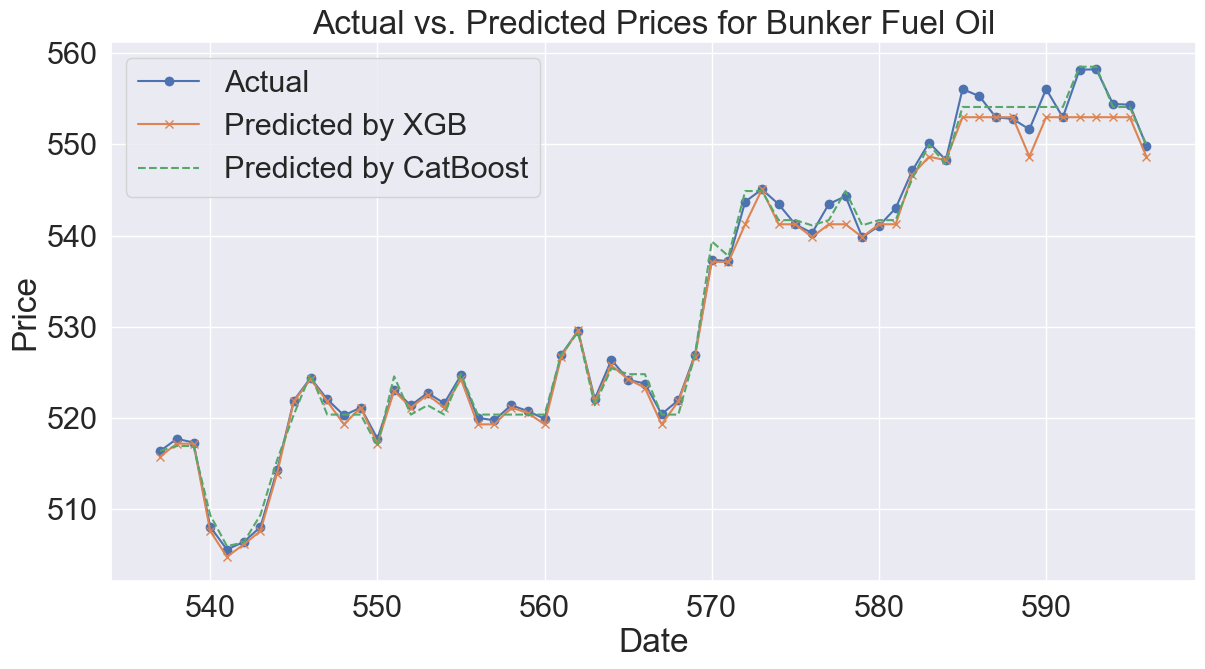

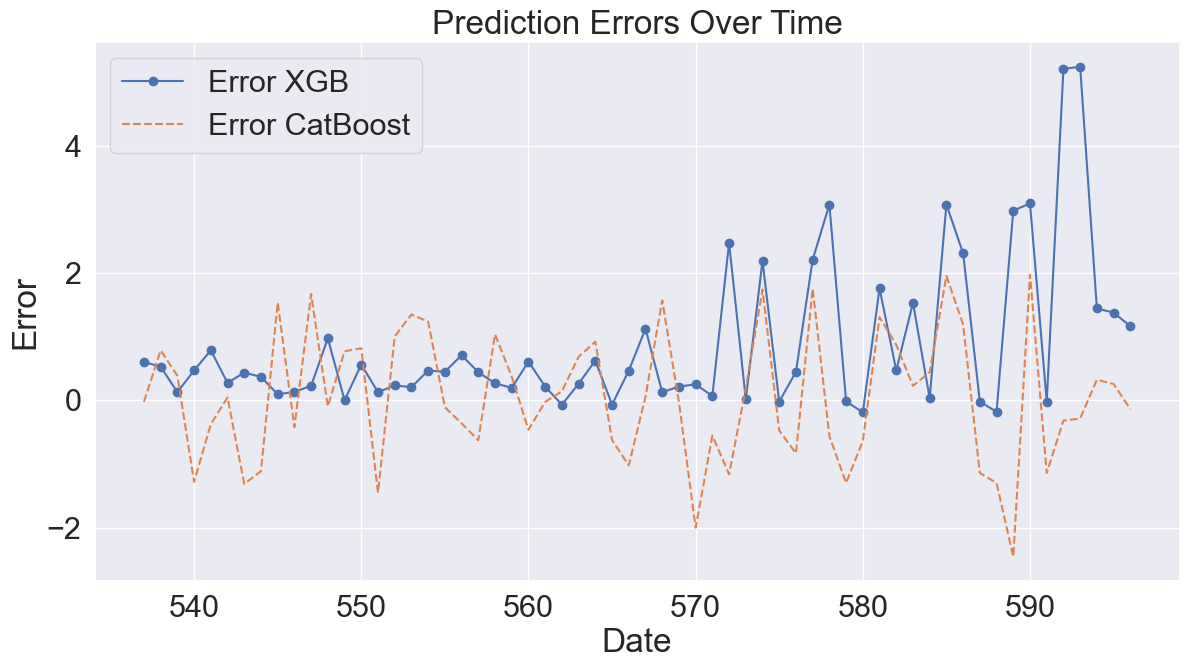

In [18]:
import matplotlib.pyplot as plt

# 실제 값과 예측 값을 시계열 그래프로 비교
plt.figure(figsize=(14, 7))
plt.plot(test_bunker.index, test_bunker['Bunker_Fuel_Oil_Avg'], label='Actual', marker='o')
plt.plot(test_bunker.index, test_predictions_xgb, label='Predicted by XGB', marker='x')
plt.plot(test_bunker.index, test_predictions_cat, label='Predicted by CatBoost', linestyle='--')
plt.title('Actual vs. Predicted Prices for Bunker Fuel Oil')
plt.xlabel('Date')
plt.ylabel('Price')
plt.legend()
plt.grid(True)
plt.show()

# 오차 시계열
errors_xgb = test_bunker['Bunker_Fuel_Oil_Avg'] - test_predictions_xgb
errors_cat = test_bunker['Bunker_Fuel_Oil_Avg'] - test_predictions_cat

plt.figure(figsize=(14, 7))
plt.plot(test_bunker.index, errors_xgb, label='Error XGB', marker='o')
plt.plot(test_bunker.index, errors_cat, label='Error CatBoost', linestyle='--')
plt.title('Prediction Errors Over Time')
plt.xlabel('Date')
plt.ylabel('Error')
plt.legend()
plt.grid(True)
plt.show()

In [19]:
# 2. Marine Gasoil에 대해 유가 예측
#    2022년 1월 4일부터 2024년 4월 22일까지의 데이터가 주말을 제외하고 포함되어 있으므로 약 28개월 분의 데이터가 들어있다.
#    이 중 1/10을 테스트 데이터로 사용했으므로 약 2.8개월 분을 예측

# "Marine Gasoil"에 해당하는 열을 선택
marine_gasoil_columns = [col for col in train_data.columns if "Marine Gasoil" in col]

# 훈련, 검증, 테스트 데이터에서 해당 열만 추출
train_marine = train_data[marine_gasoil_columns].astype(float)
val_marine = val_data[marine_gasoil_columns].astype(float)
test_marine = test_data[marine_gasoil_columns].astype(float)

# 평균값을 계산하여 새로운 대표 변수 생성
train_marine['Marine_Gasoil_Avg'] = train_marine.mean(axis=1)
val_marine['Marine_Gasoil_Avg'] = val_marine.mean(axis=1)
test_marine['Marine_Gasoil_Avg'] = test_marine.mean(axis=1)

# 확인
train_marine[['Marine_Gasoil_Avg']].head(), val_marine[['Marine_Gasoil_Avg']].head(), test_marine[['Marine_Gasoil_Avg']].head()

(   Marine_Gasoil_Avg
 1          743.60625
 3          752.95625
 4          759.21250
 5          763.86250
 6          768.59375,
      Marine_Gasoil_Avg
 418          972.39375
 419          969.45000
 420          963.59375
 421          957.38750
 422          961.40625,
      Marine_Gasoil_Avg
 537          899.15000
 538          896.09375
 539          895.48125
 540          891.21250
 541          877.83750)

In [20]:
# CatBoost 모델 초기화 및 훈련
marine_cat_model = CatBoostRegressor(iterations=500, learning_rate=0.05, depth=4, silent=True)
marine_cat_model.fit(train_marine.drop(columns=marine_gasoil_columns), train_marine['Marine_Gasoil_Avg'])

# XGBoost 모델 초기화 및 훈련
marine_xgb_model = XGBRegressor(n_estimators=500, learning_rate=0.05, max_depth=4)
marine_xgb_model.fit(train_marine.drop(columns=marine_gasoil_columns), train_marine['Marine_Gasoil_Avg'])

# 검증 데이터를 사용하여 모델 평가
val_predictions_cat = marine_cat_model.predict(val_marine.drop(columns=marine_gasoil_columns))
mse_cat = mean_squared_error(val_marine['Marine_Gasoil_Avg'], val_predictions_cat)
rmse_cat = np.sqrt(mse_cat)
r2_cat = r2_score(val_marine['Marine_Gasoil_Avg'], val_predictions_cat)

val_predictions_xgb = marine_xgb_model.predict(val_marine.drop(columns=marine_gasoil_columns))
mse_xgb = mean_squared_error(val_marine['Marine_Gasoil_Avg'], val_predictions_xgb)
rmse_xgb = np.sqrt(mse_xgb)
r2_xgb = r2_score(val_marine['Marine_Gasoil_Avg'], val_predictions_xgb)

print("MG_mse_cat:", mse_cat)
print("MG_rmse_cat:", rmse_cat)
print("MG_r2_cat:", r2_cat)

print("\nMG_mse_xgb:", mse_xgb)
print("MG_rmse_xgb:", rmse_xgb)
print("MG_r2_xgb:", r2_xgb)

MG_mse_cat: 5.478404429299002
MG_rmse_cat: 2.340599160321776
MG_r2_cat: 0.998909613332656

MG_mse_xgb: 5.046768109593351
MG_rmse_xgb: 2.2465013041601716
MG_r2_xgb: 0.9989955234720447


In [21]:
# 테스트 데이터를 사용하여 모델 평가
test_predictions_cat = marine_cat_model.predict(test_marine.drop(columns=marine_gasoil_columns))
mse_cat = mean_squared_error(test_marine['Marine_Gasoil_Avg'], test_predictions_cat)
rmse_cat = np.sqrt(mse_cat)
r2_cat = r2_score(test_marine['Marine_Gasoil_Avg'], test_predictions_cat)

test_predictions_xgb = marine_xgb_model.predict(test_marine.drop(columns=marine_gasoil_columns))
mse_xgb = mean_squared_error(test_marine['Marine_Gasoil_Avg'], test_predictions_xgb)
rmse_xgb = np.sqrt(mse_xgb)
r2_xgb = r2_score(test_marine['Marine_Gasoil_Avg'], test_predictions_xgb)

print("MG_mse_cat:", mse_cat)
print("MG_rmse_cat:", rmse_cat)
print("MG_r2_cat:", r2_cat)

print("\nMG_mse_xgb:", mse_xgb)
print("MG_rmse_xgb:", rmse_xgb)
print("MG_r2_xgb:", r2_xgb)

MG_mse_cat: 5.208396813068813
MG_rmse_cat: 2.2821912306090417
MG_r2_cat: 0.972802798403569

MG_mse_xgb: 1.782981474203362
MG_rmse_xgb: 1.335283293613517
MG_r2_xgb: 0.9906896290092692


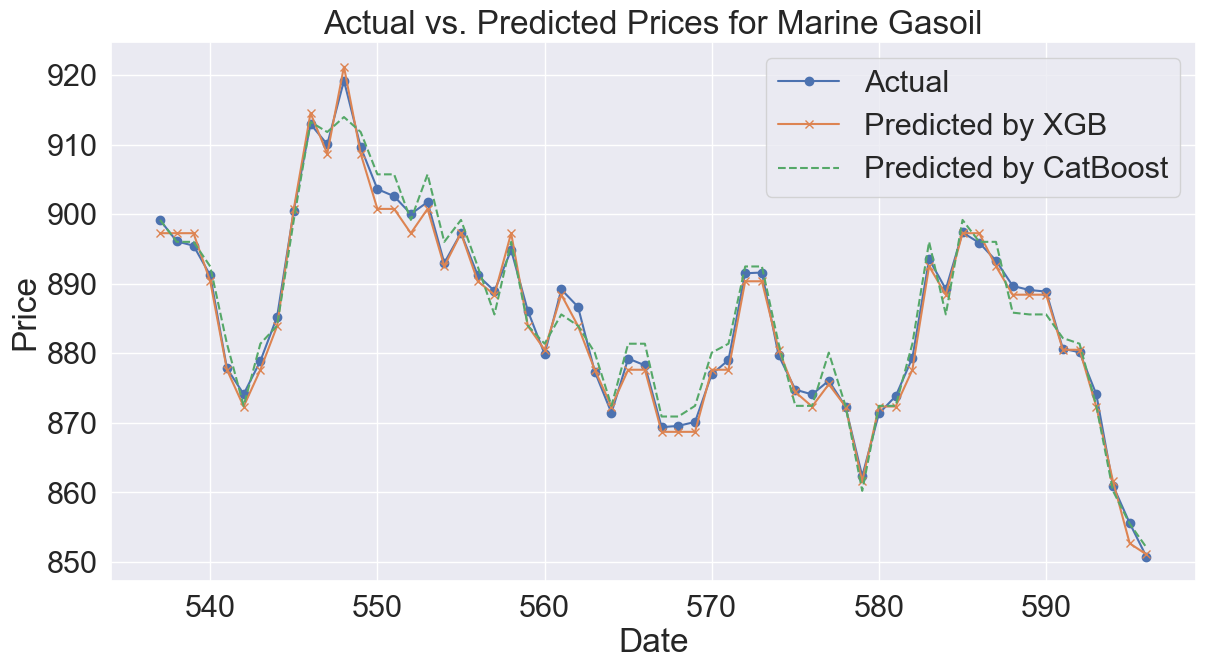

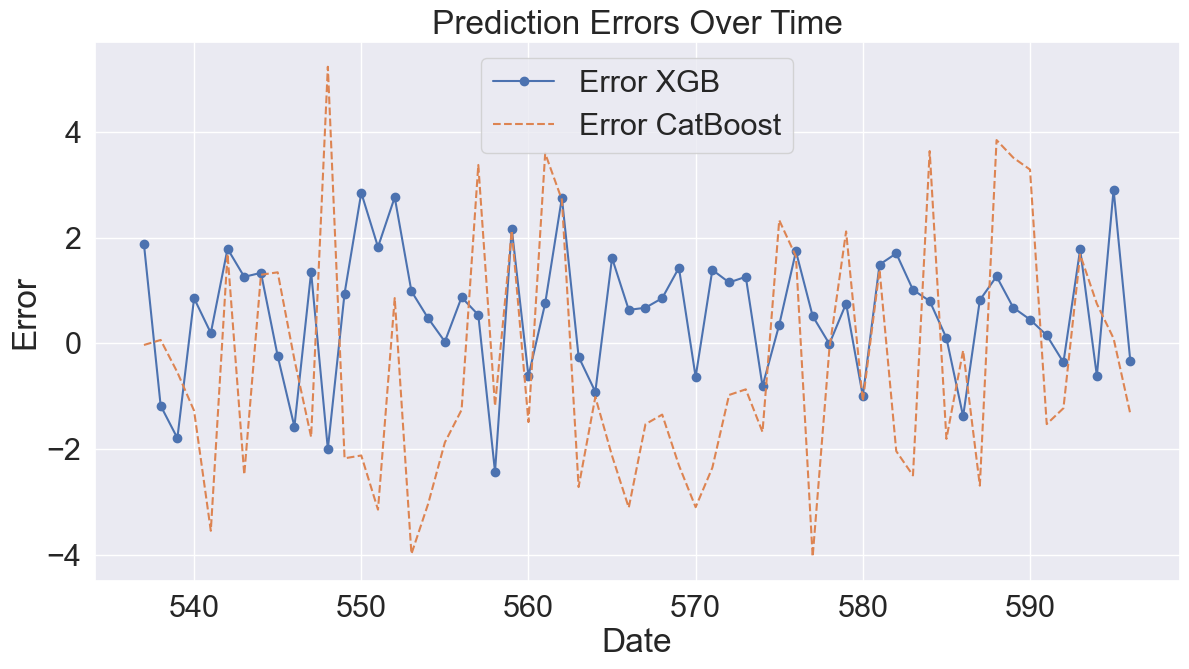

In [22]:
import matplotlib.pyplot as plt

# 실제 값과 예측 값을 시계열 그래프로 비교
plt.figure(figsize=(14, 7))
plt.plot(test_marine.index, test_marine['Marine_Gasoil_Avg'], label='Actual', marker='o')
plt.plot(test_marine.index, test_predictions_xgb, label='Predicted by XGB', marker='x')
plt.plot(test_marine.index, test_predictions_cat, label='Predicted by CatBoost', linestyle='--')
plt.title('Actual vs. Predicted Prices for Marine Gasoil')
plt.xlabel('Date')
plt.ylabel('Price')
plt.legend()
plt.grid(True)
plt.show()

# 오차 시계열
errors_xgb = test_marine['Marine_Gasoil_Avg'] - test_predictions_xgb
errors_cat = test_marine['Marine_Gasoil_Avg'] - test_predictions_cat

plt.figure(figsize=(14, 7))
plt.plot(test_marine.index, errors_xgb, label='Error XGB', marker='o')
plt.plot(test_marine.index, errors_cat, label='Error CatBoost', linestyle='--')
plt.title('Prediction Errors Over Time')
plt.xlabel('Date')
plt.ylabel('Error')
plt.legend()
plt.grid(True)
plt.show()

In [23]:
# 3. Regional Specific Products에 대해 유가 예측
#    2022년 1월 4일부터 2024년 4월 22일까지의 데이터가 주말을 제외하고 포함되어 있으므로 약 28개월 분의 데이터가 들어있다.
#    이 중 1/10을 테스트 데이터로 사용했으므로 약 2.8개월 분을 예측

# "Regional Specific Products"에 해당하는 열을 선택
regional_columns = [col for col in train_data.columns if "Regional Specific Products" in col]

# 훈련, 검증, 테스트 데이터에서 해당 열만 추출
train_regional = train_data[regional_columns].astype(float)
val_regional = val_data[regional_columns].astype(float)
test_regional = test_data[regional_columns].astype(float)

# 평균값을 계산하여 새로운 대표 변수 생성
train_regional['Regional_Specific_Products_Avg'] = train_regional.mean(axis=1)
val_regional['Regional_Specific_Products_Avg'] = val_regional.mean(axis=1)
test_regional['Regional_Specific_Products_Avg'] = test_regional.mean(axis=1)

# 확인
train_regional[['Regional_Specific_Products_Avg']].head(), val_regional[['Regional_Specific_Products_Avg']].head(), test_regional[['Regional_Specific_Products_Avg']].head()

(   Regional_Specific_Products_Avg
 1                      510.280000
 3                      519.575000
 4                      526.222778
 5                      526.583889
 6                      523.794444,
      Regional_Specific_Products_Avg
 418                      645.484444
 419                      635.353889
 420                      624.083333
 421                      620.075000
 422                      627.896111,
      Regional_Specific_Products_Avg
 537                      571.041111
 538                      571.013333
 539                      565.222222
 540                      560.615000
 541                      537.945000)

In [24]:
# CatBoost 모델 초기화 및 훈련
regional_cat_model = CatBoostRegressor(iterations=500, learning_rate=0.05, depth=4, silent=True)
regional_cat_model.fit(train_regional.drop(columns=regional_columns), train_regional['Regional_Specific_Products_Avg'])

# XGBoost 모델 초기화 및 훈련
regional_xgb_model = XGBRegressor(n_estimators=500, learning_rate=0.05, max_depth=4)
regional_xgb_model.fit(train_regional.drop(columns=regional_columns), train_regional['Regional_Specific_Products_Avg'])

# 검증 데이터를 사용하여 모델 평가
val_predictions_cat = regional_cat_model.predict(val_regional.drop(columns=regional_columns))
mse_cat = mean_squared_error(val_regional['Regional_Specific_Products_Avg'], val_predictions_cat)
rmse_cat = np.sqrt(mse_cat)
r2_cat = r2_score(val_regional['Regional_Specific_Products_Avg'], val_predictions_cat)

val_predictions_xgb = regional_xgb_model.predict(val_regional.drop(columns=regional_columns))
mse_xgb = mean_squared_error(val_regional['Regional_Specific_Products_Avg'], val_predictions_xgb)
rmse_xgb = np.sqrt(mse_xgb)
r2_xgb = r2_score(val_regional['Regional_Specific_Products_Avg'], val_predictions_xgb)

print("RSP_mse_cat:", mse_cat)
print("RSP_rmse_cat:", rmse_cat)
print("RSP_r2_cat:", r2_cat)

print("\nRSP_mse_xgb:", mse_xgb)
print("RSP_rmse_xgb:", rmse_xgb)
print("RSP_r2_xgb:", r2_xgb)

RSP_mse_cat: 1.943848572752509
RSP_rmse_cat: 1.3942197003171735
RSP_r2_cat: 0.9993392430568819

RSP_mse_xgb: 1.948011358998655
RSP_rmse_xgb: 1.3957117750447816
RSP_r2_xgb: 0.9993378280341515


In [25]:
# 테스트 데이터를 사용하여 모델 평가
test_predictions_cat = regional_cat_model.predict(test_regional.drop(columns=regional_columns))
mse_cat = mean_squared_error(test_regional['Regional_Specific_Products_Avg'], test_predictions_cat)
rmse_cat = np.sqrt(mse_cat)
r2_cat = r2_score(test_regional['Regional_Specific_Products_Avg'], test_predictions_cat)

test_predictions_xgb = regional_xgb_model.predict(test_regional.drop(columns=regional_columns))
mse_xgb = mean_squared_error(test_regional['Regional_Specific_Products_Avg'], test_predictions_xgb)
rmse_xgb = np.sqrt(mse_xgb)
r2_xgb = r2_score(test_regional['Regional_Specific_Products_Avg'], test_predictions_xgb)

print("MG_mse_cat:", mse_cat)
print("MG_rmse_cat:", rmse_cat)
print("MG_r2_cat:", r2_cat)

print("\n MG_mse_xgb:", mse_xgb)
print("MG_rmse_xgb:", rmse_xgb)
print("MG_r2_xgb:", r2_xgb)

MG_mse_cat: 1.1289534097542766
MG_rmse_cat: 1.062522192593772
MG_r2_cat: 0.9946665329998641

 MG_mse_xgb: 1.2142731340144308
MG_rmse_xgb: 1.1019406218188124
MG_r2_xgb: 0.9942634606233864


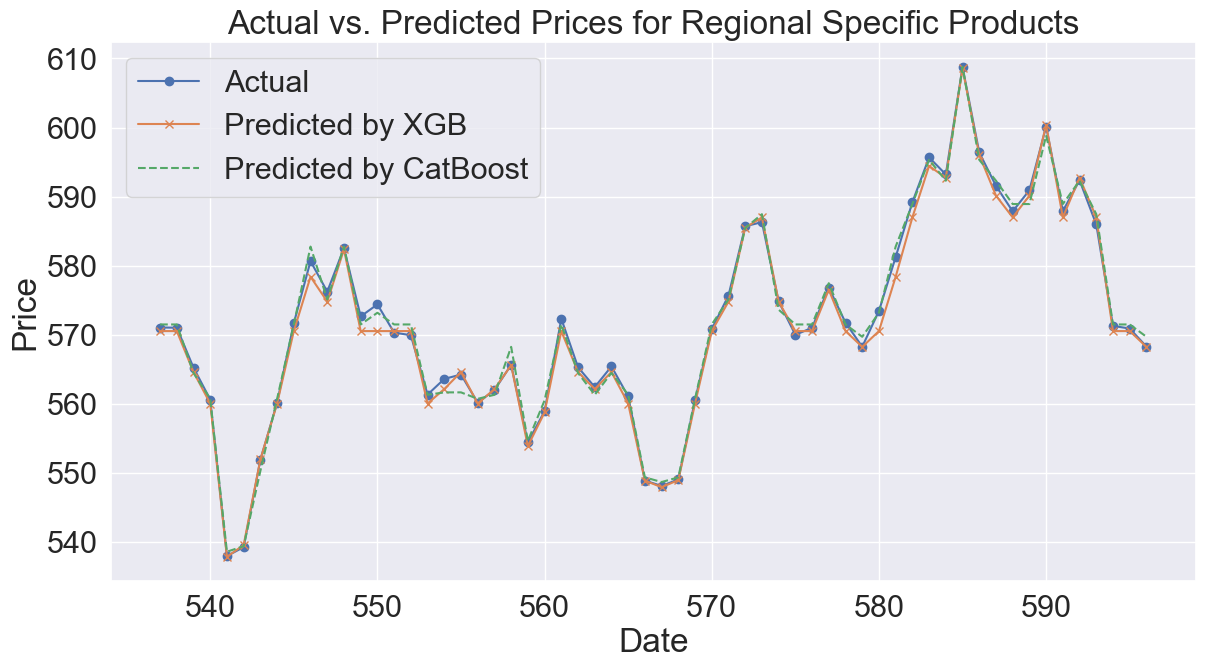

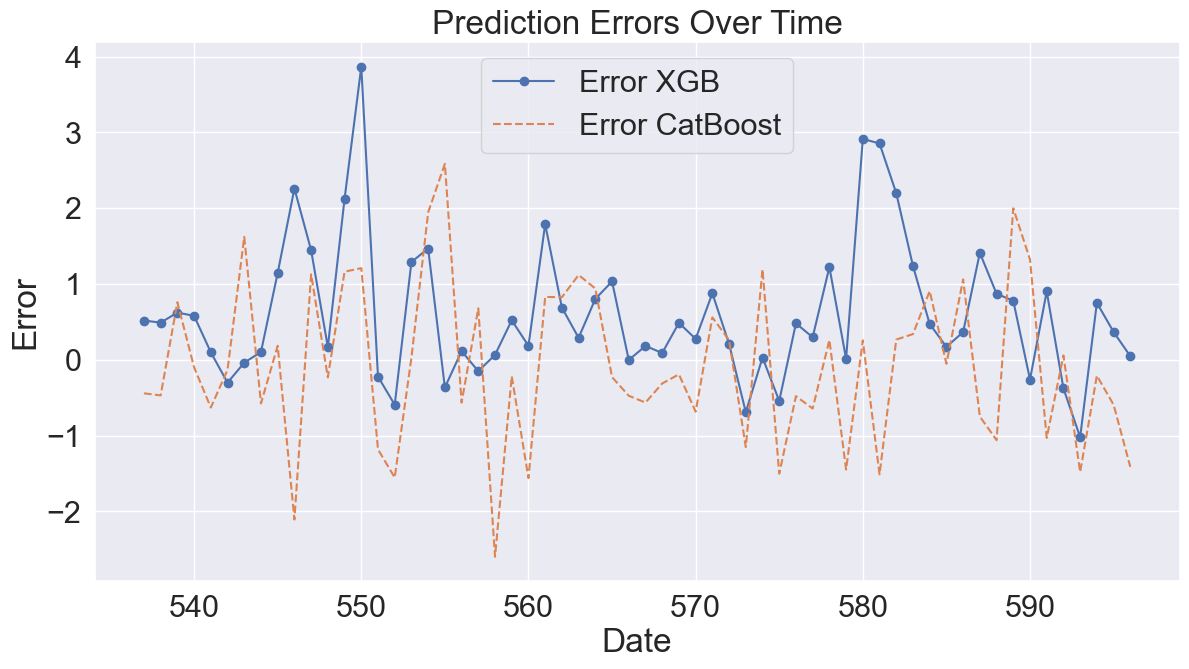

In [26]:
# 실제 값과 예측 값을 시계열 그래프로 비교
plt.figure(figsize=(14, 7))
plt.plot(test_regional.index, test_regional['Regional_Specific_Products_Avg'], label='Actual', marker='o')
plt.plot(test_regional.index, test_predictions_xgb, label='Predicted by XGB', marker='x')
plt.plot(test_regional.index, test_predictions_cat, label='Predicted by CatBoost', linestyle='--')
plt.title('Actual vs. Predicted Prices for Regional Specific Products')
plt.xlabel('Date')
plt.ylabel('Price')
plt.legend()
plt.grid(True)
plt.show()

# 오차 시계열
errors_xgb = test_regional['Regional_Specific_Products_Avg'] - test_predictions_xgb
errors_cat = test_regional['Regional_Specific_Products_Avg'] - test_predictions_cat

plt.figure(figsize=(14, 7))
plt.plot(test_regional.index, errors_xgb, label='Error XGB', marker='o')
plt.plot(test_regional.index, errors_cat, label='Error CatBoost', linestyle='--')
plt.title('Prediction Errors Over Time')
plt.xlabel('Date')
plt.ylabel('Error')
plt.legend()
plt.grid(True)
plt.show()


In [27]:
# !pip install shap

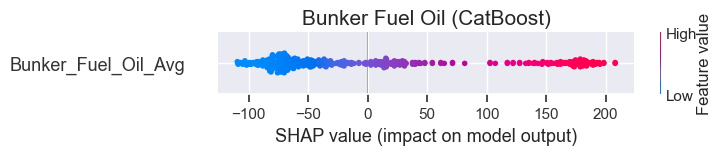

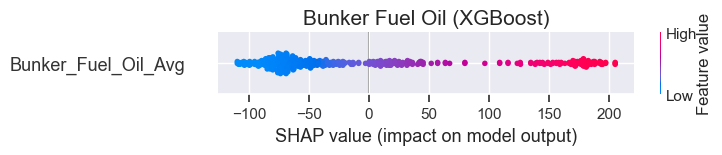

In [28]:
# 1. Bunker Fuel Oil

import shap

# catboost
bunker_cat_explainer = shap.Explainer(bunker_cat_model)
bunker_cat_shap_values = bunker_cat_explainer(train_bunker.drop(columns=bunker_fuel_oil_columns))

shap.summary_plot(bunker_cat_shap_values, train_bunker.drop(columns=bunker_fuel_oil_columns), show=False)
plt.title("Bunker Fuel Oil (CatBoost)", fontsize = 15)
plt.show()

# xgboost
bunker_xgb_explainer = shap.Explainer(bunker_xgb_model)
bunker_xgb_shap_values = bunker_xgb_explainer(train_bunker.drop(columns=bunker_fuel_oil_columns))

shap.summary_plot(bunker_xgb_shap_values, train_bunker.drop(columns=bunker_fuel_oil_columns), show=False)
plt.title("Bunker Fuel Oil (XGBoost)", fontsize = 15)
plt.show()

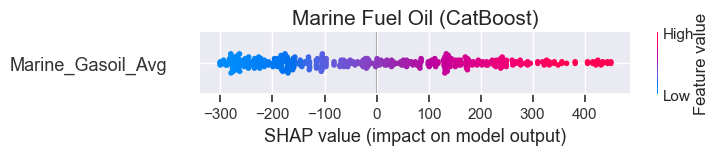

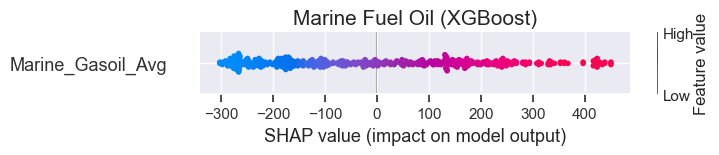

In [29]:
# 2. Marine Gasoil

# catboost
marine_cat_explainer = shap.Explainer(marine_cat_model)
marine_cat_shap_values = marine_cat_explainer(train_marine.drop(columns=marine_gasoil_columns))

shap.summary_plot(marine_cat_shap_values, train_marine.drop(columns=marine_gasoil_columns), show=False)
plt.title("Marine Fuel Oil (CatBoost)", fontsize = 15)
plt.show()

# xgboost
marine_xgb_explainer = shap.Explainer(marine_xgb_model)
marine_xgb_shap_values = marine_xgb_explainer(train_marine.drop(columns=marine_gasoil_columns))

shap.summary_plot(marine_xgb_shap_values, train_marine.drop(columns=marine_gasoil_columns), show=False)
plt.title("Marine Fuel Oil (XGBoost)", fontsize = 15)
plt.show()

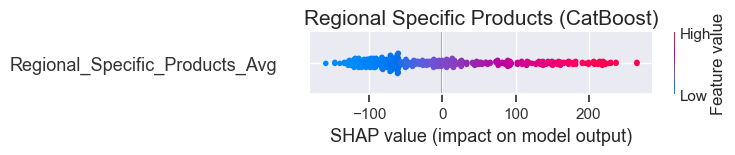

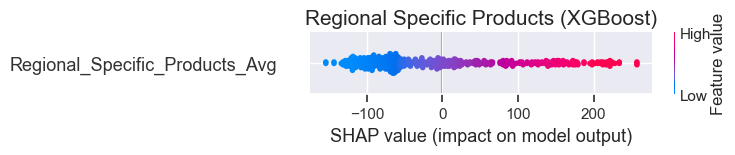

In [30]:
# 3. Regional Specific Products

import shap

# catboost
regional_cat_explainer = shap.Explainer(regional_cat_model)
regional_cat_shap_values = regional_cat_explainer(train_regional.drop(columns=regional_columns))

shap.summary_plot(regional_cat_shap_values, train_regional.drop(columns=regional_columns), show=False)
plt.title("Regional Specific Products (CatBoost)", fontsize = 15)
plt.show()

# xgboost
regional_xgb_explainer = shap.Explainer(regional_xgb_model)
regional_xgb_shap_values = regional_xgb_explainer(train_regional.drop(columns=regional_columns))

shap.summary_plot(regional_xgb_shap_values, train_regional.drop(columns=regional_columns), show=False)
plt.title("Regional Specific Products (XGBoost)", fontsize = 15)
plt.show()